<a href="https://colab.research.google.com/github/EthanW67/Machine-Learning-Research/blob/main/Machine-Learning-Research/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Workflow

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

## Data (Preparing and Loading)
1. Get data into a numberical representation
2. Build a model to learn patterns in that numerical representation.

In [ ]:
# Linear regression formula to make a straight line with known parameters

# Create known parameters
# y = ax + b
weight = 0.7 # b
bias = 0.3 # a

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts)
Create a training and testing set with our data

In [ ]:
# Create a training/testing split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
test_split = int(len(X)) - train_split
test_split

10

In [ ]:
# Visualize the data
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data= X_test, test_labels= y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  # Are there predictions>
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

  # Show the legend
  plt.legend(prop = {"size": 14})

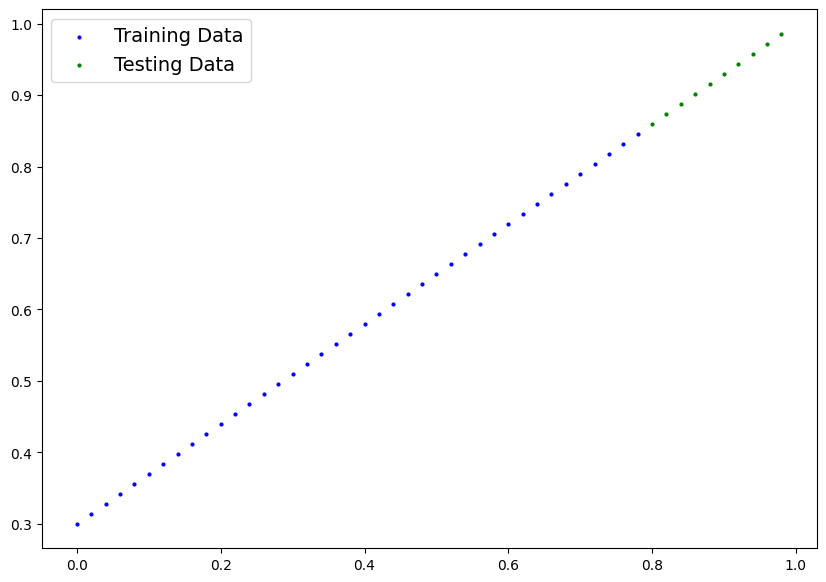

In [ ]:
plot_predictions();

## Building Model
Linear Regression Model
* Start with randome values (weight and bias)
* Looks at training data and adjusts the random values to better represent the ideal values we used to create the data

Uses two algorithms:
* Gradient Descent
* Backpropagation

In [ ]:
# Linear Regression Model Class
from torch import nn
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad= True, dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input data
    return self.weight * x + self.bias # Linear Regression Formula

### PyTorch Model Building Essential
* torch.nn - contains all of the building blocks for compuational graphs (a neural network can be considered a computational graph)
* torch.nn.Paramter - What Parameters should the model try and learn. Often a PyTorch Layer from torch.nn will set these for use.
* torch.nn.Module - Base class for all neural network modules, if subclass you should overwrite forward()
* torch.optim - where the optimizers in PyTorch live, they help with gradient descent
* def forward() - All nn.Module subclasses require you to override forward(). This method defines what happens in the forward computation

### Checking Contents of the PyTorch Model
* .parameters() - used to check the parameters or what's inside the model


In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check Parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named Parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making Predictions using torch.inferencemode()
* Testing Predictive Power (How well it prediccts y_test based on x_test)
* Pass data through our model and it'll run it through the forwaard() model

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
import torch
# Used to disable some stuff and this saves memory and such
# Make prediction with Model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# Alternative Way of Writing it
#y_preds = model_0(X_test)
#y_preds

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

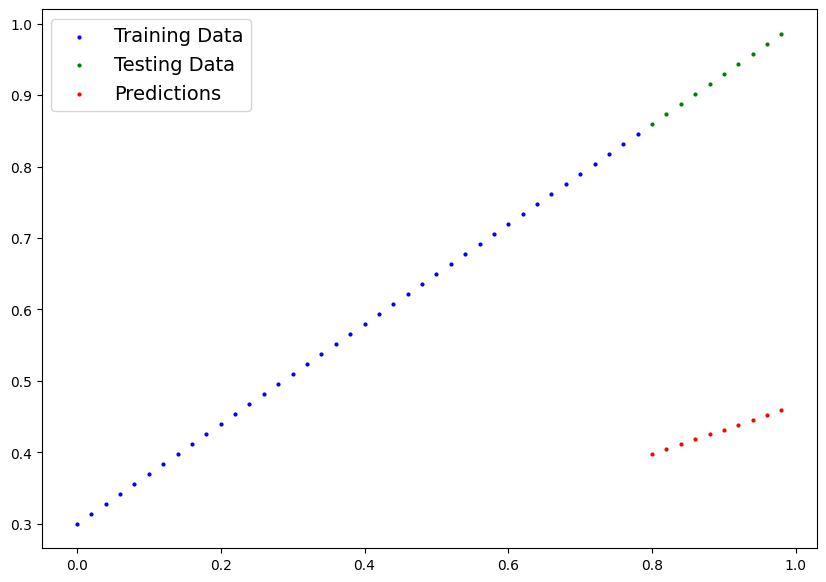

In [ ]:
plot_predictions(predictions = y_preds)

## Train Model
* Training - Moves the data from some unknown parameters to some known parameters
* From a poor representation of the data to a better represeentation of the def

* Loss Function - One way to measure how poor or wrong your model predictions are to the ideal
* The lower the better
* Also called Cost Function or Criterion

Things we need to train:
* Lost Function
* Optimizer - Takes into account the loss of a model and adjusts the model's parame ters (weights and bias) to improve the loss function
 * Params: The model paramter you'd like to optimize. i.e **params = model_0.parameters()**
 * lr (learning rate): Hyperparameter that defines how big/small the optimizer changs the parameters with each step. (Small **lr**: small changes, Large **lr**: large changes)


In PyTorch we need:
* Training Loop
* Testing Loop



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (parameter: a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
from torch import nn
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochatic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = Learning rate
                            #important - hyperparameter: Set yourself
                            # Determines how large of a set is taken when adjusting the w & b



Regression Problems:
* Loss Fucntion: nn.L1Loss()
* Optimizer: torch.optim.SGD()

Classification Problems
(Classifying whether a picture is a dog or a cat):
* Loss Function: nn.SCELoss() (binary cross entropy loss)
* Optimizer:

### Building a Training Loop & Testing Loop In PyTorch
Things we need in a training loop:
0. Loop through the data
1. Forward pass (this involes data movin through our model's **forward()** function) to make predictions on data
 * Also called Forward Propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer Zero Grad
4. Loss Backward: Moves backwards through the netwrok to calculate the gradients of each of the parameters of our model with respect to the (**Backpropagation**)
5. Optimizer Step: Uses theh optimizer to adjust the model's parameters to try and improve the loss (**Gradient Descent**)


In [ ]:
import numpy as np

torch.manual_seed(42)

# Epoch: one loop throught the data (hyperparameters: set be ourselves)
epochs = 200

#Track Different Values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):

  # Set model to training mode
  model_0.train() # Train Mode: Sets all paramaters that requires gradient to require gradients

  # 1. Forward Pass (Forward Propagation)
  y_pred = model_0(X_train)

  # 2. Calculate the Loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss {loss}")

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Perform Back Propagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the Optimizer (Perform Gradient Descent)
  optimizer.step() # by default how to optimizer changes will acculumate the loop so...
  # we have to 0 them above step 3 for the next interation of the loop

  ### Testing
  model_0.eval() # Turns off stuff not needed for revaulation/testing (dropout/batchnorm layers)

  with torch.inference_mode(): # Turns off gradient tracking and some other stuff
  # torch.no_grad() is also the same thing
    # a. Do forward pass
    test_pred = model_0(X_test)

    # b. Calculate the Loss
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      # Print Out
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      # Print out model state_dict()
      print(model_0.state_dict())


Loss 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss 0.3013603389263153
Loss 0.28983935713768005
Loss 0.2783183455467224
Loss 0.26679736375808716
Loss 0.2552763521671295
Loss 0.24375534057617188
Loss 0.23223432898521423
Loss 0.22071333229541779
Loss 0.20919232070446014
Loss 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss 0.18615034222602844
Loss 0.1746293306350708
Loss 0.16310831904411316
Loss 0.1515873372554779
Loss 0.14006635546684265
Loss 0.1285453587770462
Loss 0.11702437698841095
Loss 0.1060912236571312
Loss 0.09681284427642822
Loss 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss 0.08227583020925522
Loss 0.07638873159885406
Loss 0.

In [ ]:
epoch_count,np.array(torch.tensor(loss_values).numpy()), test_loss_values

In [ ]:
# Plot the Loss Curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values,label = "Test Loss")
plt.title("Training and Test Loss Curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
plot_predictions(predictions = y_preds_new)

In [ ]:
weight, bias

## Saving a Model In PyTorch
Three Methods fro saving and loading nn.ModuleList
1. `torch.save()`- allows you to save a PyTorch object in Python's pickle format
2. `torch.load()`- allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allow you to load a model's saved state dictionary

In [ ]:
model_0.state_dict()

In [ ]:
# Saving PyTorch Model
from pathlib import Path

#1. Create Model directory
MODEL_PATH = Path("Model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create Model Save Path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save  the model state dict
print(f" Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
!ls -l Model

## Loading a PyTorch Model

Saved the model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

In [ ]:
# to load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [ ]:
loaded_model_0.state_dict()

In [ ]:
# Make some predictiosn with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

In [ ]:
# Compare Loaded Model pred with original model preds
y_preds == loaded_model_preds

## Putting Everything Together

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

Create device-agnostic code
* If there is access to GPU it will use it.
* If no GPU it will default to CPU

In [ ]:
# Setup Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

### Creating Data

In [ ]:
# Create data using using Linear Regresssion Formula (y = weight * X + bias)
weight = 0.7
bias = 0.3

# Create Range Values
start = 0
end = 1
step = 0.02

# Create X and Y
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

In [ ]:
# Split Data
Split_data = int(0.8 * len(X))
x_train, y_train = X[: Split_data], y[: Split_data]
x_test, y_test = X[Split_data:], y[Split_data:]
len(x_train)

In [ ]:
# Plot Data
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu())

### Building PyTorch Linear Model



In [ ]:
from torch import nn

# Create a linear model by subclassin nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters/ Also called
    # Linear Transform, Probing Layer, Fully Connect Layer, Dense Layer
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

  # Set Manual Seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


In [ ]:
# Check the Model_Current Device
next(model_1.parameters()).device

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

### Training
* Lost Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup lost function
loss_fn = nn.L1Loss() # Same as MSE

# Setup Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)

In [ ]:
# Write Training Loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer Zero grad
  optimizer.zero_grad()

  #4. Perform Backpropagation
  loss.backward()

  #5. Optimizer Setup
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

In [ ]:
model_1.state_dict()

In [ ]:
weight, bias

### Making and Evaluating Predictions

In [ ]:
# Turn model into Evaluation Mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

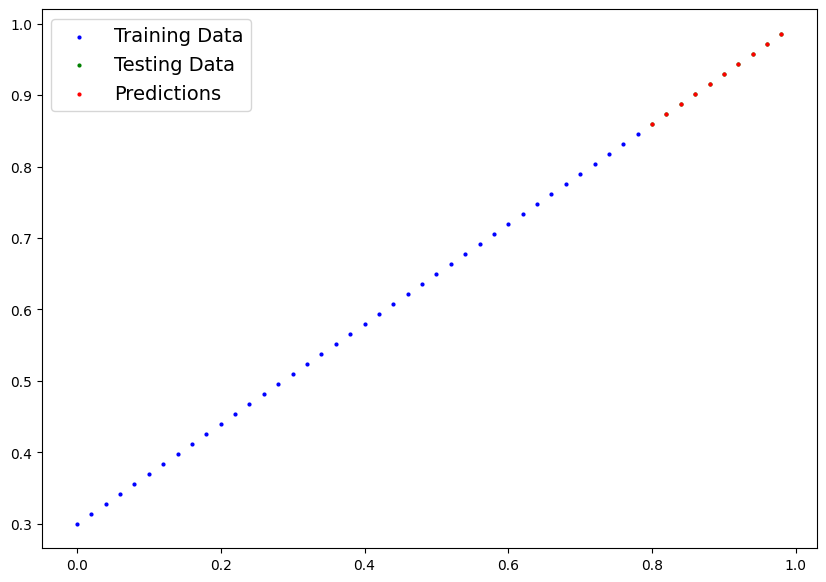

In [ ]:
# Check out Model Predictions visually
plot_predictions(predictions = y_preds.cpu())

### Saving & Loading a Trained Model

In [ ]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents =True, exist_ok = True)

# Create Model save path
MODEL_NAME = "01_pytorch.workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch.workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Load a PyTorch model

# Create a new instance of Linear Regression Model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaulate Loaded Model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])